# Phân nhóm khách hàng trong siêu thị 
Dữ liệu: tuổi, thu nhập, thói quen mua sắm. 
K-means chia khách hàng thành các cụm: sinh viên thu nhập thấp, người đi làm thu nhập trung bình, người giàu hay mua hàng xa xỉ. 
Giúp siêu thị xây dựng chương trình khuyến mãi phù hợp.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

## Huấn luyện K-means + chọn K (Elbow & Silhouette)

c:\Users\CaRot\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\CaRot\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\CaRot\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\CaRot\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1039

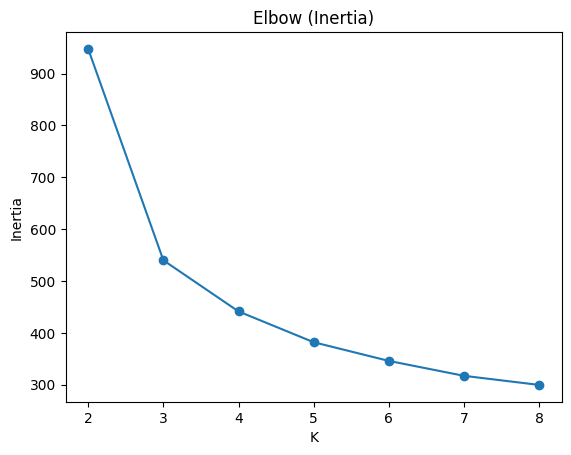

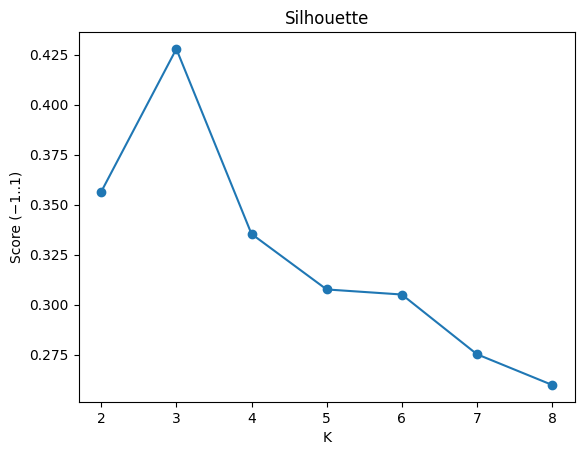

Cụm (trung bình đặc trưng):
      Age  Income_M_VND  VisitsPerMonth  LuxurySpendRatio  Cluster
0  21.11          6.28           10.77              0.10        0
1  31.44         17.43            5.97              0.20        1
2  36.88         60.65            3.01              0.65        2
3  43.15         23.89            4.05              0.27        3
Đã lưu: supermarket_customers_kmeans_labeled.csv


In [2]:
# 1) Đọc dữ liệu
df = pd.read_csv("supermarket_customers_kmeans.csv")
X = df[["Age", "Income_M_VND", "VisitsPerMonth", "LuxurySpendRatio"]].copy()

# 2) Chuẩn hóa (rất quan trọng cho K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) Chọn K bằng Elbow & Silhouette
inertias, sils, Ks = [], [], range(2, 9)
for k in Ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(X_scaled, km.labels_))

plt.figure()
plt.plot(list(Ks), inertias, marker="o")
plt.title("Elbow (Inertia)"); plt.xlabel("K"); plt.ylabel("Inertia"); plt.show()

plt.figure()
plt.plot(list(Ks), sils, marker="o")
plt.title("Silhouette"); plt.xlabel("K"); plt.ylabel("Score (−1..1)"); plt.show()

# 4) Chọn K (ví dụ: 4 cụm theo mô tả bài toán)
k = 4
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df["Cluster"] = labels

# 5) Xem trung bình từng cụm (trên thang gốc, dễ hiểu)
centers_scaled = kmeans.cluster_centers_
centers = pd.DataFrame(scaler.inverse_transform(centers_scaled),
                       columns=X.columns)
centers["Cluster"] = range(k)
print("Cụm (trung bình đặc trưng):\n", centers.round(2))

# 6) Lưu kết quả
df.to_csv("supermarket_customers_kmeans_labeled.csv", index=False)
print("Đã lưu: supermarket_customers_kmeans_labeled.csv")

## Dự đoán cụm cho khách hàng mới

In [3]:
# Ví dụ khách hàng mới
new_cust = pd.DataFrame([{
    "Age": 23,
    "Income_M_VND": 7.5,      # ~7.5 triệu/tháng
    "VisitsPerMonth": 12,
    "LuxurySpendRatio": 0.08
}])

new_scaled = scaler.transform(new_cust)
cluster_id = kmeans.predict(new_scaled)[0]
print("Khách hàng mới thuộc cụm:", int(cluster_id))

# Khoảng cách tới từng tâm cụm (gợi ý mức “phù hợp”)
from numpy.linalg import norm
dists = [norm(new_scaled - c) for c in kmeans.cluster_centers_]
print("Khoảng cách tới các cụm:", np.round(dists, 3))

Khách hàng mới thuộc cụm: 0
Khoảng cách tới các cụm: [0.44  2.178 4.963 3.482]


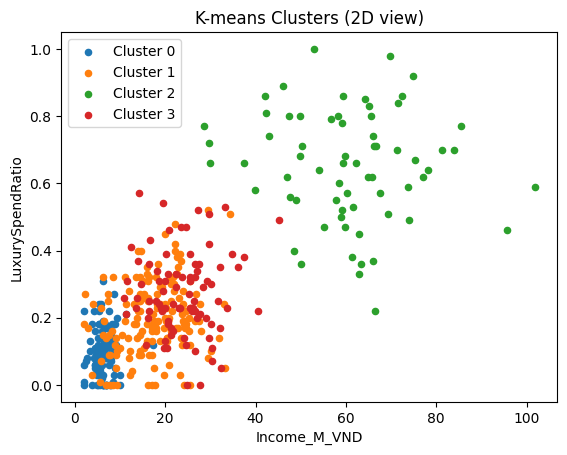

In [4]:
import matplotlib.pyplot as plt

ax_x, ax_y = "Income_M_VND", "LuxurySpendRatio"  # đổi thành cặp bạn muốn
plt.figure()
for c in sorted(df["Cluster"].unique()):
    sub = df[df["Cluster"] == c]
    plt.scatter(sub[ax_x], sub[ax_y], label=f"Cluster {c}", s=20)
plt.xlabel(ax_x); plt.ylabel(ax_y); plt.legend(); plt.title("K-means Clusters (2D view)")
plt.show()

# Nhận diện khuôn mặt không cần gắn nhãn

Tập ảnh khuôn mặt nhưng không biết ai là ai.

K-means gom lại thành các cụm (người A, người B, người C).

Dùng trong ứng dụng tự động tổ chức album ảnh (giống Google Photos).

## Gom cụm khuôn mặt không cần nhãn

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

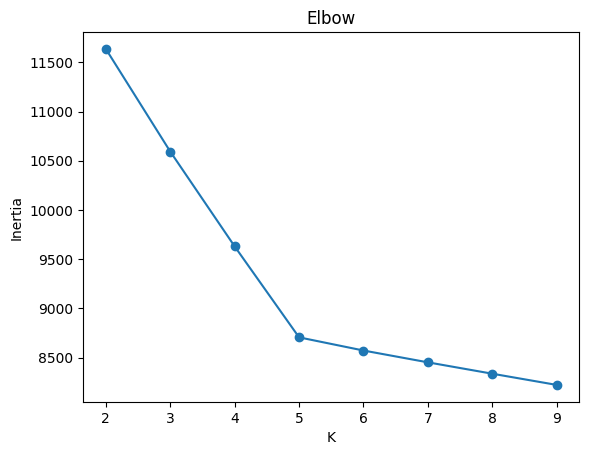

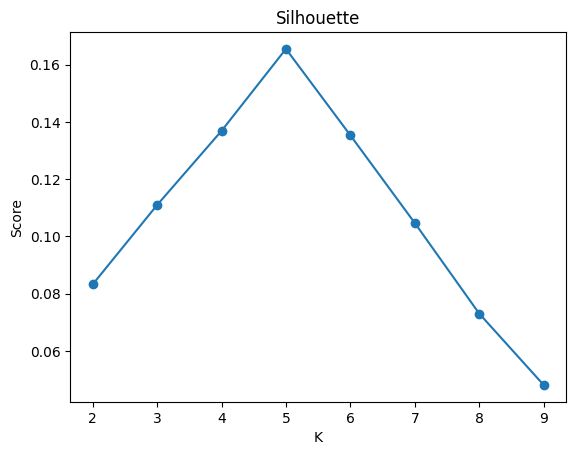

  image_name  cluster_id
0   A_00.jpg           2
1   A_01.jpg           2
2   A_02.jpg           2
3   A_03.jpg           2
4   A_04.jpg           2
5   A_05.jpg           2
6   A_06.jpg           2
7   A_07.jpg           2
8   A_08.jpg           2
9   A_09.jpg           2

Bảng chéo (nhãn mô phỏng vs cụm):
 cluster_id         0   1   2   3   4
person_simulated                    
A                  0   0  20   0   0
B                 20   0   0   0   0
C                  0   0   0  20   0
D                  0  20   0   0   0
E                  0   0   0   0  20


In [6]:
# 1) Đọc embeddings
df = pd.read_csv("face_embeddings_synthetic.csv")
X = df.filter(like="f").to_numpy()  # lấy các cột f000..f127

# (Tùy chọn) nếu bạn KHÔNG muốn nhìn thấy nhãn mô phỏng:
# df = df.drop(columns=["person_simulated"])

# 2) Chuẩn hóa
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) Chọn K (thử elbow + silhouette)
Ks = range(2, 10)
inertias, sils = [], []
for k in Ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(X_scaled, labels))

plt.figure(); plt.plot(list(Ks), inertias, marker="o")
plt.title("Elbow"); plt.xlabel("K"); plt.ylabel("Inertia"); plt.show()

plt.figure(); plt.plot(list(Ks), sils, marker="o")
plt.title("Silhouette"); plt.xlabel("K"); plt.ylabel("Score"); plt.show()

# 4) Chọn K=5 (vì mình giả lập 5 người)
k = 5
kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df["cluster_id"] = labels

# 5) Xem kết quả nhanh
print(df[["image_name", "cluster_id"]].head(10))

# (Tùy chọn) Nếu có cột 'person_simulated', bạn có thể kiểm tra độ “khớp”
if "person_simulated" in df.columns:
    ctab = pd.crosstab(df["person_simulated"], df["cluster_id"])
    print("\nBảng chéo (nhãn mô phỏng vs cụm):\n", ctab)

## “Gán tên người” cho từng cụm (semi-supervised, sau khi bạn nhìn ảnh đại diện)

In [7]:
# Ví dụ: sau khi xem ảnh đại diện mỗi cụm, bạn gán nhãn thủ công
cluster_to_name = {
    0: "Person_A",
    1: "Person_B",
    2: "Person_C",
    3: "Person_D",
    4: "Person_E",
}
df["identity_assigned"] = df["cluster_id"].map(cluster_to_name)
df.to_csv("face_embeddings_clustered.csv", index=False)
print("Đã lưu face_embeddings_clustered.csv")

Đã lưu face_embeddings_clustered.csv


## Dự đoán cụm cho ảnh mới (embedding mới)

In [8]:
# Ví dụ 1 vector embedding mới (128-D). Thay bằng embedding thật của bạn.
x_new = np.random.normal(0, 1, size=(1, X.shape[1]))

# Chuẩn hóa cùng scaler trước đó:
x_new_scaled = scaler.transform(x_new)

# Dự đoán cụm
cid = kmeans.predict(x_new_scaled)[0]
print("Ảnh mới thuộc cụm:", int(cid))

# (Nếu đã đặt tên cụm)
print("=> Gán người:", cluster_to_name.get(cid, f"Cluster_{cid}"))

Ảnh mới thuộc cụm: 4
=> Gán người: Person_E


## (Tuỳ chọn) Giảm chiều để vẽ 2D cho đẹp (PCA/UMAP)

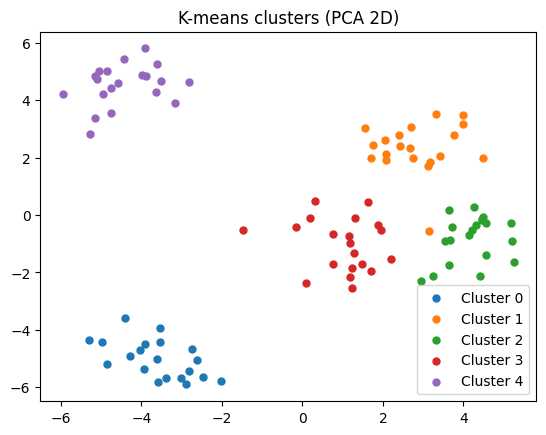

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pts2d = pca.fit_transform(X_scaled)

plt.figure()
for c in sorted(np.unique(labels)):
    idx = labels == c
    plt.scatter(pts2d[idx, 0], pts2d[idx, 1], s=25, label=f"Cluster {c}")
plt.legend(); plt.title("K-means clusters (PCA 2D)"); plt.show()